In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [3]:
snapshots = [8, 13, 21] # z = 8, 6, 4

In [4]:
# loading halo and subhalo data
data_dir = "/mnt/gosling1/boryanah/TNG300/"
snap_ind = 2 # say that we are interested in snapshot 21, i.e. z = 4

# subhalos
SubhaloGrNr = np.load(f"{data_dir:s}/SubhaloGrNr_{snapshots[snap_ind]:d}_fp.npy")
SubhaloSFR = np.load(f"{data_dir:s}/SubhaloSFR_{snapshots[snap_ind]:d}_fp.npy")
SubhaloMassType = np.load(f"{data_dir:s}/SubhaloMassType_{snapshots[snap_ind]:d}_fp.npy")*1.e10
SubhaloStellarMass = SubhaloMassType[:, 4] # stars
SubhaloMass = np.sum(SubhaloMassType, axis=1) # total

# halos
Group_M_Mean200 = np.load(f"{data_dir:s}/Group_M_Mean200_{snapshots[snap_ind]:d}_fp.npy")*1.e10
Group_M_Crit200 = np.load(f"{data_dir:s}/Group_M_Crit200_{snapshots[snap_ind]:d}_fp.npy")*1.e10
Group_M_TopHat200 = np.load(f"{data_dir:s}/Group_M_TopHat200_{snapshots[snap_ind]:d}_fp.npy")*1.e10

In [5]:
# select the central subhalos
unique_hosts, sub_inds_cent = np.unique(SubhaloGrNr, return_index=True)

# halo mass of each central subhalo
halo_mass = Group_M_Mean200[unique_hosts]
gal_sfr = SubhaloSFR[sub_inds_cent]
gal_mass = SubhaloMass[sub_inds_cent]
gal_mstar = SubhaloStellarMass[sub_inds_cent]

In [13]:
# put in a cut to cut on the number of objects to plot
mstar_cut = 1.e8 # Msun/h
choice = gal_mstar > 1.e8
halo_mass = halo_mass[choice]
gal_mass = gal_mass[choice]
gal_mstar = gal_mstar[choice]
gal_sfr = gal_sfr[choice]

In [27]:
import plotparams
plotparams.buba()

'Now using buba'

Text(0,0.5,'Star formation rate [Msun/yr]')

/home/boryanah/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


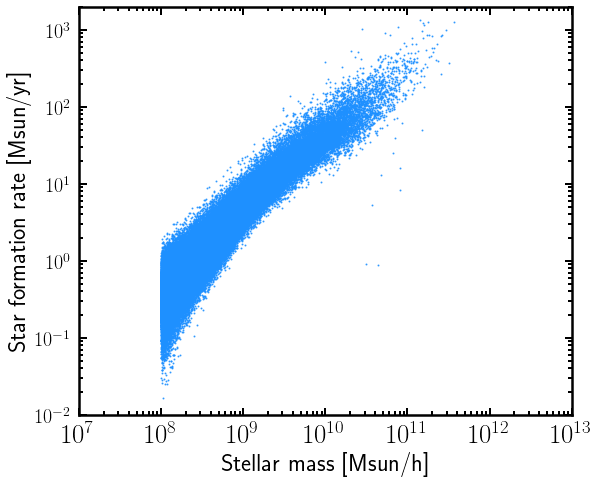

In [29]:
# plot sfr vs stellar masss, sfr vs subhalo mass, sfr vs host halo mass, stellar mass vs subhalo mass, 
# stellar mass vs host halo mass, subhalo mass vs host halo mass
s = 1
alpha = 0.8

plt.figure(figsize=(9, 7))
plt.scatter(gal_mstar, gal_sfr, s=s, alpha=alpha, color='dodgerblue')
plt.xlim([1.e7, 1.e13])
plt.ylim([1.e-2, 2.e3])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Stellar mass [Msun/h]')
plt.ylabel('Star formation rate [Msun/yr]')

Text(0,0.5,'Star formation rate [Msun/yr]')

/home/boryanah/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


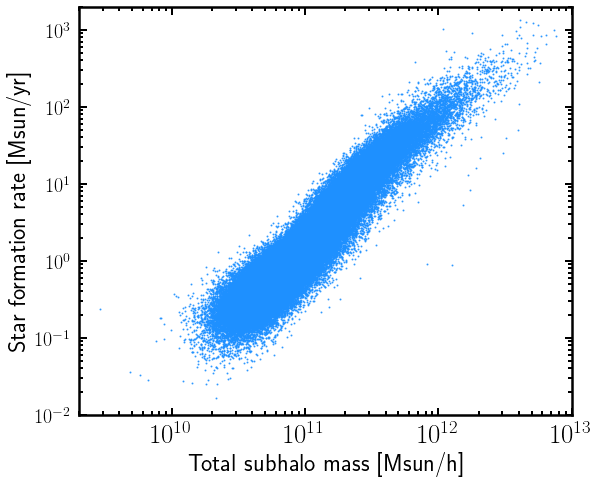

In [31]:
plt.figure(figsize=(9, 7))
plt.scatter(gal_mass, gal_sfr, s=s, alpha=alpha, color='dodgerblue')
plt.xlim([2.e9, 1.e13])
plt.ylim([1.e-2, 2.e3])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Total subhalo mass [Msun/h]')
plt.ylabel('Star formation rate [Msun/yr]')

Text(0,0.5,'Star formation rate [Msun/yr]')

/home/boryanah/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/boryanah/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


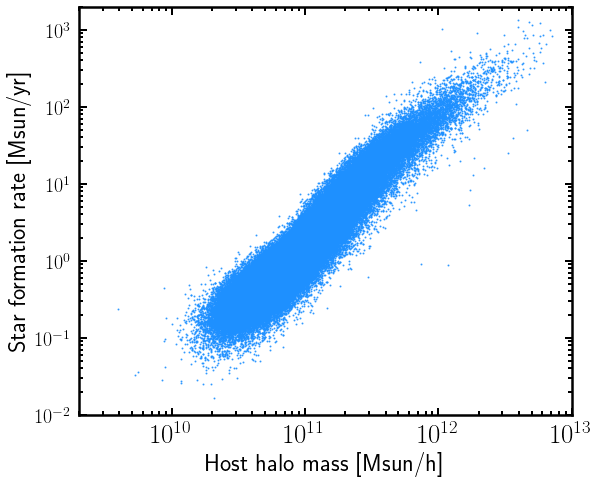

In [33]:
plt.figure(figsize=(9, 7))
plt.scatter(halo_mass, gal_sfr, s=s, alpha=alpha, color='dodgerblue')
plt.xlim([2.e9, 1.e13])
plt.ylim([1.e-2, 2.e3])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Host halo mass [Msun/h]')
plt.ylabel('Star formation rate [Msun/yr]')

Text(0,0.5,'Total subhalo mass [Msun/h]')

/home/boryanah/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/boryanah/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


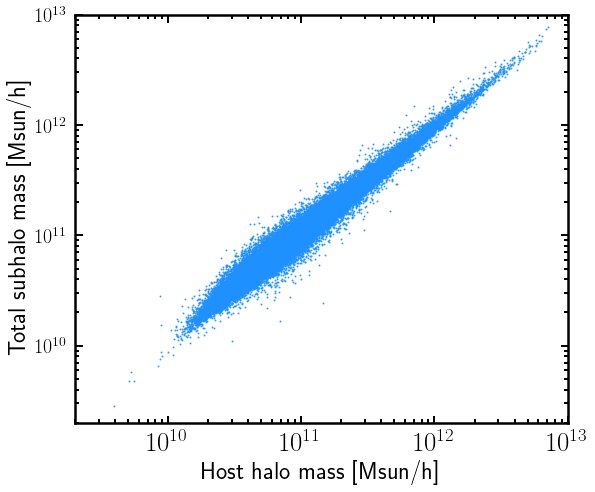

In [34]:
plt.figure(figsize=(9, 7))
plt.scatter(halo_mass, gal_mass, s=s, alpha=alpha, color='dodgerblue')
plt.xlim([2.e9, 1.e13])
plt.ylim([2.e9, 1.e13])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Host halo mass [Msun/h]')

plt.ylabel('Total subhalo mass [Msun/h]')

Text(0.5,0,'Host halo mass/subhalo mass [Msun/h]')

/home/boryanah/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


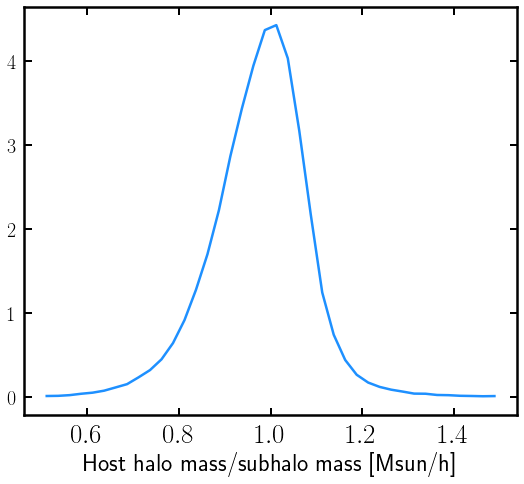

In [43]:
ratio_mass = halo_mass/gal_mass
bins = np.linspace(0.5, 1.5, 41)
binc = (bins[1:]+bins[:-1])*.5
hist, _ = np.histogram(ratio_mass, bins=bins, density=True)

plt.figure(figsize=(9, 7))
plt.plot(binc, hist, color='dodgerblue')
plt.xlabel('Host halo mass/subhalo mass [Msun/h]')

Text(0,0.5,'Stellar-to-halo mass ratio')

/home/boryanah/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


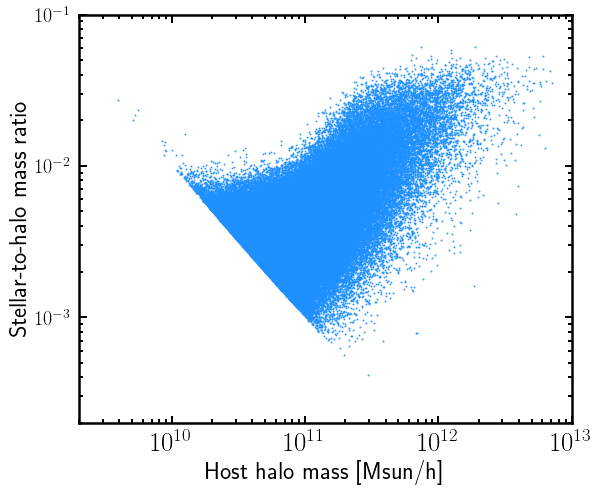

In [42]:
plt.figure(figsize=(9, 7))
plt.scatter(halo_mass, gal_mstar/halo_mass, s=s, alpha=alpha, color='dodgerblue')
plt.xlim([2.e9, 1.e13])
#plt.ylim([1.e7, 2.e12])
plt.ylim([2.e-4, 1.e-1])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Host halo mass [Msun/h]')
plt.ylabel('Stellar-to-halo mass ratio')

Text(0,0.5,'Specific star formation rate [yr-1]')

/home/boryanah/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/boryanah/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


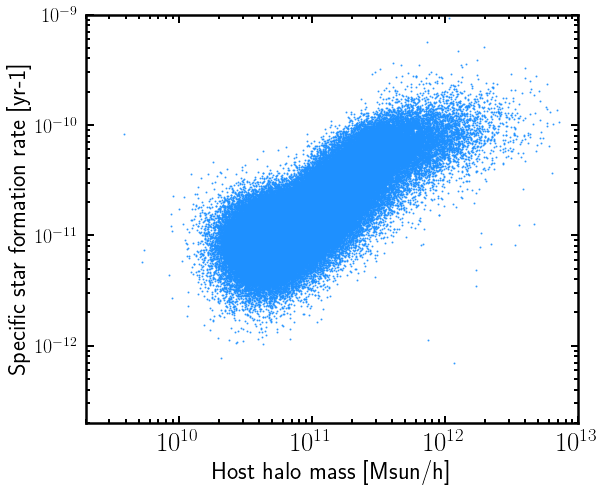

In [49]:
plt.figure(figsize=(9, 7))
plt.scatter(halo_mass, gal_sfr/gal_mass, s=s, alpha=alpha, color='dodgerblue')
plt.xlim([2.e9, 1.e13])
#plt.ylim([1.e7, 2.e12])
plt.ylim([2.e-13, 1.e-9])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Host halo mass [Msun/h]')
plt.ylabel('Specific star formation rate [yr-1]')